In [1]:
from turtle import shape
import numpy as np
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.cluster import KMeans

np.random.seed(seed=10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
def cross_entropy(preds, targets, reduction='none'):
    log_softmax = nn.LogSoftmax(dim=-1)
    loss = (-targets * log_softmax(preds)).sum(1)
    if reduction == "none":
        return loss.sum()
    elif reduction == "mean":
        return loss.mean()


class NN_F(nn.Module):
    def __init__(self):
        super(NN_F, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 16 x 14 x 14
            nn.BatchNorm2d(16),

            nn.Conv2d(16, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 7 x 7
            nn.BatchNorm2d(128),

            nn.Flatten(), 
            nn.Linear(128*7*7, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128))
        
    def forward(self, x):
        return self.network(x)


class NN_M(torch.nn.Module):
    def __init__(self):
        super(NN_M, self).__init__()
        self.network = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784, 512),
        nn.BatchNorm1d(512),

        nn.ReLU(),
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),

        nn.ReLU(),
        nn.Linear(256, 128))

    def forward(self, x):
        return self.network(x)
train_set = datasets.FashionMNIST('./data', train=True, download=True,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860,), (0.3530,))
        ]))

test_set = datasets.FashionMNIST('./data', train=False, download=True,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860,), (0.3530,))
        ]))


x_train = train_set.data.numpy()
x_test = test_set.data.numpy()
y_train = train_set.targets.numpy()
y_test = test_set.targets.numpy()

x_0 = x_train[y_train==0,:]
x_1 = x_train[y_train==1,:]
x_2 = x_train[y_train==2,:]
x_3 = x_train[y_train==3,:]
x_4 = x_train[y_train==4,:]
x_5 = x_train[y_train==5,:]
x_6 = x_train[y_train==6,:]
x_7 = x_train[y_train==7,:]
x_8 = x_train[y_train==8,:]
x_9 = x_train[y_train==9,:]

x_0_test = x_test[y_test==0,:]
x_1_test = x_test[y_test==1,:]
x_2_test = x_test[y_test==2,:]
x_3_test = x_test[y_test==3,:]
x_4_test = x_test[y_test==4,:]
x_5_test = x_test[y_test==5,:]
x_6_test = x_test[y_test==6,:]
x_7_test = x_test[y_test==7,:]
x_8_test = x_test[y_test==8,:]
x_9_test = x_test[y_test==9,:]
xf_trains = [x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9]
xf_tests = [x_0_test,x_1_test,x_2_test,x_3_test,x_4_test,x_5_test,x_6_test,x_7_test,x_8_test,x_9_test]


train_set = datasets.MNIST('./data', train=True, download=True,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ]))

test_set = datasets.MNIST('./data', train=False, download=True,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ]))

x_train = (np.reshape(train_set.data.numpy(),newshape=(60000,28*28)))
x_test = (np.reshape(test_set.data.numpy(),newshape=(10000,28*28)))
y_train = train_set.targets.numpy()
y_test = test_set.targets.numpy()

x_0 = x_train[y_train==0,:]
x_1 = x_train[y_train==1,:]
x_2 = x_train[y_train==2,:]
x_3 = x_train[y_train==3,:]
x_4 = x_train[y_train==4,:]
x_5 = x_train[y_train==5,:]
x_6 = x_train[y_train==6,:]
x_7 = x_train[y_train==7,:]
x_8 = x_train[y_train==8,:]
x_9 = x_train[y_train==9,:]

x_0_test = x_test[y_test==0,:]
x_1_test = x_test[y_test==1,:]
x_2_test = x_test[y_test==2,:]
x_3_test = x_test[y_test==3,:]
x_4_test = x_test[y_test==4,:]
x_5_test = x_test[y_test==5,:]
x_6_test = x_test[y_test==6,:]
x_7_test = x_test[y_test==7,:]
x_8_test = x_test[y_test==8,:]
x_9_test = x_test[y_test==9,:]
xm_trains = [x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9]
xm_tests = [x_0_test,x_1_test,x_2_test,x_3_test,x_4_test,x_5_test,x_6_test,x_7_test,x_8_test,x_9_test]

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



epoch : 0 loss:9.210102081298828
train Accuracy : 0.09900000000000003
test Accuracy : 0.09555
train Accuracy old: 0.11
test Accuracy old: 0.103
epoch : 0 loss:9.224964141845703
train Accuracy : 0.10300000000000002
test Accuracy : 0.09885
train Accuracy old: 0.05
test Accuracy old: 0.098
epoch : 0 loss:9.222116470336914
train Accuracy : 0.09250000000000001
test Accuracy : 0.09780000000000001
train Accuracy old: 0.06
test Accuracy old: 0.062
epoch : 0 loss:9.20306396484375
train Accuracy : 0.10750000000000003
test Accuracy : 0.0981
train Accuracy old: 0.02
test Accuracy old: 0.023
epoch : 0 loss:9.220983505249023
train Accuracy : 0.08450000000000002
test Accuracy : 0.0902
train Accuracy old: 0.08
test Accuracy old: 0.07
epoch : 0 loss:36.84672558641434
train Accuracy : 0.08500000000000002
test Accuracy : 0.0962
train Accuracy old: 0.08
test Accuracy old: 0.095
epoch : 0 loss:20.273242444992064
train Accuracy : 0.09300000000000003
test Accuracy : 0.09219999999999999
train Accuracy old: 0.

ValueError: ignored

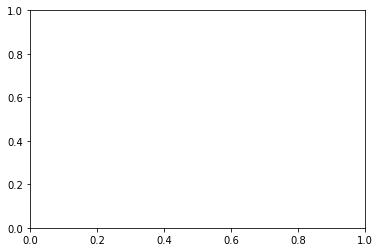

In [7]:
def train_test_acc(noise_prob,tau1,tau2,beta,loss_type,nper,n_epoch,graph_clustering_algo,n_clusters):
    n_per_class = nper
    n = 10 * n_per_class

    XF=np.zeros((n,28,28))
    XM=np.zeros((n,784))

    ##### Gxf[i] represensent the classes that it belongs to. As we have n_per_class images per class
    ##### then Gxf[i*n_per_class+j]={i} for 0<=j<n_per_class
    Gxf={}
    for i in range(n): Gxf[i]=set()
    Gxm={}
    for i in range(n): Gxm[i]=set()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    for i in range(10):
        for j in range(n_per_class):
            Gxf[i*n_per_class+j].add(i)
            XF[i*n_per_class+j,:,:] = xf_trains[i][j,:]

    for i in range(10):
        for j in range(n_per_class):
            Gxm[i*n_per_class+j].add(i)
            XM[i*n_per_class+j,:] = xm_trains[i][j,:]

    ##### commons_xf[i] shows which images from the mnist dataset is the same class (paired with) as the ith image in fashion-mnist dataset.
    ##### similary commons_xm[i] shows which images from the fashion-mnist dataset is the same class (paired with) as the ith image in mnist dataset.
    commons_xf, commons_xm = {}, {}
    for i in range(n): commons_xf[i]=[]
    for i in range(n): commons_xm[i]=[]
    commons_xf, commons_xm = [], []
    for i in range(n): commons_xf.append([])
    for i in range(n): commons_xm.append([])

    for i in range(n):
        for j in range(n):
            if len(Gxf[i].intersection(Gxm[j])) > 0:
                commons_xf[i].append(j)
                commons_xm[j].append(i)


    ##### Similarly we create test datasets. Note that we have n_test samples from fashion-mnist dataset whereas we have 10 samples from the 
    ##### mnist dataset belonging to different classes. For each sample from the fashion-mnist, we will look at the similarities with the 10 mnist samples, 
    ##### then classify accordingly. 
    n_per_class_test = 100
    n_test = n_per_class_test * 10
    XF_test=np.zeros((n_per_class_test*10,28,28))
    XM_test=np.zeros((10,784))
    XM_test_from_old_samples = np.zeros((10,784))

    
    ##### Gxf_test[i] represensent the classes that it belongs to. As we have n_per_class_test images per class
    ##### then Gxf_test[i*n_per_class_test+j]={i} for 0<=j<n_per_class_test
    Gxf_test={}
    for i in range(n_per_class_test*10): Gxf_test[i]=set()
    Gxm_test={}
    for i in range(10): Gxm_test[i]=set()

    for i in range(10):
        for j in range(n_per_class_test):
            Gxf_test[i*n_per_class_test+j].add(i)
            XF_test[i*n_per_class_test+j,:,:] = xf_tests[i][j,:]

    for i in range(10):
        random_idx = np.random.randint(low=0,high=200)
        Gxm_test[i].add(i)
        XM_test[i,:] = xm_tests[i][random_idx,:]

    ##### We also create XM_test_from_old_samples from the training samples. Note that this is just checking whether our model is able to 
    ##### classify training samples correctly. 
    for i in range(10):
        XM_test_from_old_samples[i,:] = XM[i*n_per_class,:]


    XF = torch.tensor(XF,dtype=torch.float32).to(device)
    XM = torch.tensor(XM,dtype=torch.float32).to(device)
    XF_test = torch.tensor(XF_test,dtype=torch.float32).to(device)
    
    n_test = n_per_class_test * 10
    XF_test = torch.reshape(XF_test,shape=(n_test,1,28,28))

    XM_test = torch.tensor(XM_test,dtype=torch.float32).to(device)
    XM_test_from_old_samples = torch.tensor(XM_test_from_old_samples,dtype=torch.float32).to(device)


    nn_f = NN_F().to(device)
    nn_m = NN_M().to(device)
    lr = 0.001
    optimizer_nn = optim.SGD([{'params': nn_f.parameters(),'lr':lr},
                    {'params': nn_m.parameters(), 'lr': lr}], lr=lr, momentum=0.9)
    scheduler_nn = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_nn,factor=0.3,eps=1e-12,patience=10,verbose=True)
    
    # CUDA for PyTorch
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")

    # Parameters
    params = {'batch_size': 200,
              'shuffle': True,
              'num_workers': 6}
    XF = torch.reshape(XF,shape=(n,1,28,28))

    ##### target_label_f is an nxn matrix, (i,j)th entry shows whether there is a ground truth edge between ith fashion-mnist sample and
    ##### jth mnist sample.
    target_label_f = torch.zeros(n,n).to(device)
    for i in range(n):
        for j in commons_xf[i]:
            target_label_f[i,j] = 1

    tau_matrix_f = (1/tau1) * torch.ones(size=(n,n))  ##### Do not worry about tau1, it is just tau1=1 for this paper. This was created to use different tau values 
    ##### for each (i,j) pairs, but for this paper, it is just 1.
    

    for i in range(n):
        for j in range(n):
            if np.random.uniform(low=0,high=1) < noise_prob:
                target_label_f[i,j] = 1 - target_label_f[i,j]  ##### This is the distortion, with probability noise_prob
                # tau_matrix_f[i,j] = (1/tau2).  

    n_edges = torch.sum(target_label_f)
    target_label_m = target_label_f.detach().clone().t() 
    tau_matrix_m = tau_matrix_f.t()
    tau_matrix_f = tau_matrix_f.to(device)
    tau_matrix_m = tau_matrix_m.to(device)

    loss_values = np.zeros(shape=(n_epoch,))



    ##### Bipartite Spectral Graph Multi-Partitioning 
    if  graph_clustering_algo=="Spectral":
        D1 = np.diag(target_label_f.detach().clone().cpu().numpy().sum(axis=1))    
        D2 = np.diag(target_label_m.detach().clone().cpu().numpy().sum(axis=1))
        An = (np.diag(1/np.sqrt(np.diag(D1))))@target_label_f.detach().clone().cpu().numpy()@(np.diag(1/np.sqrt(np.diag(D2))))
        U,S,VH = np.linalg.svd(An)
        k = n_clusters-1
        z1 = np.diag(1/np.sqrt(np.diag(D1)))@np.flip(U[:,1:1+k],axis=1)
        z2 = np.diag(1/np.sqrt(np.diag(D2)))@np.flip(VH.T[:,1:1+k],axis=1)
        Z = np.concatenate((z1,z2),axis=0)
        kmeans = KMeans(n_clusters = n_clusters)
        kmeans.fit(Z)
        colors = kmeans.labels_

        colors1 = colors[:n]
        colors2 = colors[n:]
        target_new_f = np.zeros((n,n))

        for i in range(n):
            for j in range(n):
                if colors1[i] == colors2[j]:
                    target_new_f[i,j] = 1

        target_label_f = torch.tensor(target_new_f).to(device)
        target_label_m = target_label_f.detach().clone().t()

    for _ in range(n_epoch):
        optimizer_nn.zero_grad()
        X_ = F.normalize(nn_f(XF),dim=1)
        Y_ = F.normalize(nn_m(XM),dim=1)

        loss = 0
        logits_f = torch.matmul(X_,Y_.t()) * tau_matrix_f
        logits_m = torch.matmul(Y_,X_.t()) * tau_matrix_m

        if loss_type == "info_nce":
            loss += cross_entropy(logits_f, target_label_f, reduction='none')/n_edges
            loss += cross_entropy(logits_m, target_label_m, reduction='none')/n_edges
        

        if _%100==0:
            print(f"epoch : {_} loss:{loss.data}")
        loss_values[_] = loss.data
        loss.backward()
        optimizer_nn.step()
        scheduler_nn.step(loss)



    nn_f.eval()
    nn_m.eval()


    #####  TESTING TRAINING DATASET WITH NEW TEST SAMPLES (Fashion-MNIST samples are from training dataset, whereas mnist samples are from the test dataset)
    ensure_level_for_testdata = 20  ##### We sample test samples randomly ensure_level_for_testdata times, and average accuracies
    train_acc = 0
    for i_ensure_level in range(ensure_level_for_testdata):
        XM_test=np.zeros((10,784))
        for i in range(10):
            random_idx = np.random.randint(low=0,high=200)
            XM_test[i,:] = xm_tests[i][random_idx,:]
        XM_test = torch.tensor(XM_test,dtype=torch.float32).to(device)
            
        XF_out = F.normalize(nn_f(XF),dim=1)
        XM_test_out = F.normalize(nn_m(XM_test),dim=1)
        corrects_train = 0
        for i in range(n):
            max_ = -10 
            max_class_ = -1
            for j in range(10):
                sim = torch.dot(XF_out[i,:], XM_test_out[j,:]).item()
                if sim > max_:
                    max_ = sim
                    max_class_ = j
            if max_class_ == i//n_per_class : corrects_train += 1   

        train_acc += corrects_train/(n*ensure_level_for_testdata)
    print(f"train Accuracy : {train_acc}")


    #####  TESTING TEST DATASET WITH NEW TEST SAMPLES (Fashion-MNIST samples and Mnist samples are from training dataset, so this gives us the accuracy we looking for)
    ensure_level_for_testdata = 20 ##### We sample test samples randomly ensure_level_for_testdata times, and average accuracies
    test_acc = 0
    for i_ensure_level in range(ensure_level_for_testdata):
        XM_test=np.zeros((10,784))
        for i in range(10):
            random_idx = np.random.randint(low=0,high=200)
            XM_test[i,:] = xm_tests[i][random_idx,:]
        XM_test = torch.tensor(XM_test,dtype=torch.float32).to(device)

        XF_test_out = F.normalize(nn_f(XF_test),dim=1)
        XM_test_out = F.normalize(nn_m(XM_test),dim=1)

        corrects = 0
        for i in range(n_test):
            max_ = -10 
            max_class_ = -1
            for j in range(10):
                sim = torch.dot(XF_test_out[i,:], XM_test_out[j,:]).item()
                if sim > max_:
                    max_ = sim
                    max_class_ = j
            if max_class_ == i//n_per_class_test : corrects += 1

        test_acc += corrects/(n_test*ensure_level_for_testdata)
    print(f"test Accuracy : {test_acc}")


    #####  TESTING TRAINING DATASET WITH OLD TEST SAMPLES (Fashion-MNIST samples are from training dataset, and mnist samples are from the training dataset too)
    XF_out = F.normalize(nn_f(XF),dim=1)
    XM_test_out = F.normalize(nn_m(XM_test_from_old_samples),dim=1)
    corrects_train = 0
    for i in range(n):
        max_ = -10 
        max_class_ = -1
        for j in range(10):
            sim = torch.dot(XF_out[i,:], XM_test_out[j,:]).item()
            if sim > max_:
                max_ = sim
                max_class_ = j
        if max_class_ == i//n_per_class : corrects_train += 1   

    train_acc_old = corrects_train/n
    print(f"train Accuracy old: {corrects_train/n}")

    #####  TESTING TEST DATASET WITH OLD TEST SAMPLES  (Fashion-MNIST samples are from test dataset, and mnist samples are from the training dataset)
    XF_test_out = F.normalize(nn_f(XF_test),dim=1)
    XM_test_out = F.normalize(nn_m(XM_test_from_old_samples),dim=1)

    corrects = 0
    for i in range(n_test):
        max_ = -10 
        max_class_ = -1
        for j in range(10):
            sim = torch.dot(XF_test_out[i,:], XM_test_out[j,:]).item()
            if sim > max_:
                max_ = sim
                max_class_ = j
        if max_class_ == i//n_per_class_test : corrects += 1

    test_acc_old = corrects/n_test
    print(f"test Accuracy old: {corrects/n_test}")


    return train_acc,test_acc, train_acc_old,test_acc_old,loss_values



loss_types = ["info_nce"]
clustering_list = [False,"Spectral"]
noise_probs = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
npers = [50] ##### number of samples per class in the training set
n_epoch = 2000
n_clusters_list = [5,7,10,13,15] ##### This is the number of cluster that we want to have after graph spectral partititoning algortithm.

train_acc_values = np.zeros((len(noise_probs),len(clustering_list),len(npers),len(n_clusters_list)))
test_acc_values = np.zeros((len(noise_probs),len(clustering_list),len(npers),len(n_clusters_list)))
train_acc_old_values = np.zeros((len(noise_probs),len(clustering_list),len(npers),len(n_clusters_list)))
test_acc_old_values = np.zeros((len(noise_probs),len(clustering_list),len(npers),len(n_clusters_list)))
loss_vals = np.zeros((len(noise_probs),n_epoch,len(clustering_list),len(npers),len(n_clusters_list)))
ensure_level = 1 ##### One can increse this to do the same experiments several times and take the average
beta = 0.001
tau1 = 1
tau2 = tau1


for _ in range(ensure_level):
    for idx_,noise_prob in enumerate(noise_probs):
        for i_lustering,graph_clustering_algo in enumerate(clustering_list):
            for i_n,nper in enumerate(npers):
                for i_ncluster,n_clusters in enumerate(n_clusters_list):
                    loss_type = loss_types[0]
                    acc1,acc2,acc3,acc4,loss_values = train_test_acc(noise_prob,tau1,tau2,beta,loss_type,nper,n_epoch,graph_clustering_algo,n_clusters)
                    train_acc_values[idx_,i_lustering,i_n,i_ncluster] += acc1/ensure_level
                    test_acc_values[idx_,i_lustering,i_n,i_ncluster] += acc2/ensure_level
                    train_acc_old_values[idx_,i_lustering,i_n,i_ncluster] += acc3/ensure_level
                    test_acc_old_values[idx_,i_lustering,i_n,i_ncluster] += acc4/ensure_level
                    loss_vals[idx_,:,i_lustering,i_n,i_ncluster] = loss_values/ensure_level

    np.savez(f"BSGMP.npz",train_acc_values=train_acc_values,test_acc_values=test_acc_values,train_acc_old_values=train_acc_old_values,
                                                    test_acc_old_values=test_acc_old_values,loss_vals=loss_vals)





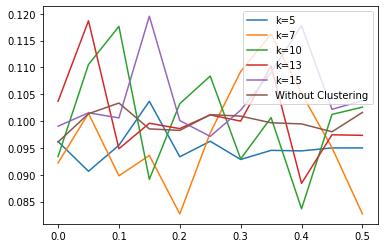

In [8]:
import matplotlib.pyplot as plt
data = np.load("BSGMP.npz")
test_acc = data["test_acc_values"]
plt.figure()
plt.plot(noise_probs,test_acc[:,1,0,0])
plt.plot(noise_probs,test_acc[:,1,0,1])
plt.plot(noise_probs,test_acc[:,1,0,2])
plt.plot(noise_probs,test_acc[:,1,0,3])
plt.plot(noise_probs,test_acc[:,1,0,4])
without_clustering = (test_acc[:,0,0,0]+test_acc[:,0,0,1]+test_acc[:,0,0,2]+test_acc[:,0,0,3]+test_acc[:,0,0,4])/5
plt.plot(noise_probs, without_clustering)
plt.legend(["k=5","k=7","k=10","k=13","k=15","Without Clustering"])
plt.show()